In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from statistics import mean, median, mode

In [2]:
df_train = pd.read_excel(f'../../../code-mixed-enma2/code-mixed-enma-2/hasoc_task_2/Malayalam_offensive_data_Training-YT.xlsx')
df_train.dropna(inplace=True)
df_train.head()

,ID,Tweets,Labels
0,MA_YT001,Thaankal enthaan cheyyarullath?😛,NOT
1,MA_YT002,Ee theetam WCC feminichigalude news aarkk vena...,OFF
2,MA_YT003,fukru nem tiktok oolakale vilich charcha nadat...,OFF
3,MA_YT004,Aashiq abu produce cheytharunnel ee problems u...,NOT
4,MA_YT005,Pennungal oru team aayal ath moonjum ennu epoo...,OFF


In [3]:
df_train.shape

(3999, 3)

In [4]:
df_test = pd.read_csv(f'../../../code-mixed-enma2/code-mixed-enma-2/hasoc_task_2/malayalam_hasoc_tanglish_test_without_labels.tsv', sep='\t', header=None)
df_test.head()

,0,1
0,MA_YT5000,Chenkol vendath thanne aayirunnu....
1,MA_YT5001,Sundardasinte bhakshnam vakkukal ano?
2,MA_YT5002,Akasha dooth oru copy adi movie anu 'Who will ...
3,MA_YT5003,Purath onnum pondade... oru pennum payyanum on...
4,MA_YT5004,Avasanam Fahad oru Oscar medikkumbazhum lalett...


In [5]:
df_test.shape

(951, 2)

In [6]:
import unicodedata as ud

latin_letters= {}

def is_latin(uchr):
    try: return latin_letters[uchr]
    except KeyError:
         return latin_letters.setdefault(uchr, 'LATIN' in ud.name(uchr))

def only_roman_chars(unistr):
    return all(is_latin(uchr)
           for uchr in unistr
           if uchr.isalpha()) # isalpha suggested by John Machin

In [7]:
count = 0
for index, row in df_train.iterrows():
    if not only_roman_chars(row['Tweets']):
        print(index, row['Tweets'], row['Labels'])
        print('\n\n')
        count +=1
print(1 - count/len(df_train))

246 Evl Commited anenðŸ¥º lokath ethilum gethikettavn vere arum kanilaðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ¤£ðŸ¤£ðŸ¤£ OFF



311 Veera paniyille sahooo... Tym waisted..... ðŸ¤ª enthuvaadai eth NOT



415 Valla varka panikum poykoode..ijjathi itetheyoke interview cheyanðŸ¥ºðŸ¥º OFF



469 Orange thopURL satyam eth enthonnu ðŸ˜‚ðŸ¤ª NOT



492 Ennalum keralathilum engane kuru pottunnavar undalloo ennu oorkkumbozhaðŸ˜ªðŸ˜ª NOT



556 Ingalu elladathum undallo â˜ºï¸ðŸ˜ƒ NOT



628 Paavam aa chknte kili poyeenn thonnan history kettitt ðŸ˜‚ðŸ˜‚ After *Le boy: pullu parayandarnnðŸ˜ª NOT



649 Athrakkk Artificial ayindðŸ¤ªðŸ¤ªðŸ¤ª NOT



670 Aaadyam aa chekkanitta kodukkendath.. Aa monjathiye propose cheyyaan poyeen ðŸ˜ªðŸ˜ŒðŸ˜‚ OFF



688 Ath angine kure kanaa konaa teams...ðŸ˜ðŸ¤ªðŸ˜œ NOT



977 Cheriya kaliyallaâ˜ºprabudharaaya janamðŸ˜¢ðŸ˜¢ NOT



979 Ethilipom arayan serikum vellam kudiURL â˜ºðŸ˜‚ NOT



1004 Next CM URL vijayan Ni okke evda kidanond korachukondee erikum... Karanam korakkum poorikall

In [8]:
count = 0
for index, row in df_test.iterrows():
    if not only_roman_chars(row[1]):
        print(index, row[1])
        print('\n\n')
        count +=1
print(1 - count/len(df_test))

1.0


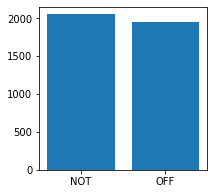

In [9]:
# Class distribution in training set
D = Counter(df_train['Labels'])
plt.rcParams["figure.figsize"] = (3,3)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [11]:
# Min, Max, Avg no of sentences per class in Training set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  1952
Max no. of sentences:  2047
Avg no. of sentences:  1999.5
Median of sentences:  1999.5


In [12]:
def tokenize(s: str):
    return s.split()

In [13]:
# variation in length of sentences in train set
len_of_tokens = []
for index, row in df_train.iterrows():
    tokens = tokenize((row['Tweets']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  62
Avg no. of tokens:  9.99349837459365
Median of no. of tokens:  8


In [14]:
# variation in length of sentences in test set
len_of_tokens = []
for index, row in df_test.iterrows():
    tokens = tokenize((row[1]).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  526
Avg no. of tokens:  10.47844374342797
Median of no. of tokens:  9
